# <center> Pandas Analysis Project </center>

- [Project Background](#section_1)
- [Project Datasets](#section_2)
- [Explore Data and Extract Findings](#section_3)

<hr>

### Project Background <a class="anchor" id="section_1"></a>

So far in this course, you have learned how to use the Python library Pandas to tackle different data processing and analysis tasks. In this section, you will apply what you have learned to a simple data analysis project and extract useful insights from multiple datasets.

As we all know, the world has been facing a significant health crisis from 2019. Many people around the world have had to change the way they work, study and travel in order to fight the virus. In this project, we will examine different health and human activities datasets to see how COVID19 impacted our daily lives.

### Project Datasets <a class="anchor" id="section_2"></a>


The following datasets will be used:

* [`Community Mobility Reports`](https://www.google.com/covid19/mobility/): Aggregated datasets generated by google to report movement trends over time by geographical location.

* [`COVID19 Confirmed Cases`](https://github.com/owid/covid-19-data/tree/master/public/data): A daily aggregated dataset collected and maintained by Our World in Data.

Let’s first collect these datasets and see what kind of insights we can find about the response and impact of Covid outbreak on our local city, community and country.

We will first get the global mobility report dataset by downloading the CSV file from the website and saving it into our local computer. So all we need now is to read this dataset as a Pandas dataframe.

For the second dataset of daily Covid cases, the file is updated daily and uploaded to a GitHub repo. 
So there is no need for us to download the local copy as we can access the data directly from the GitHub repo.

In [3]:
# Import pandas
import pandas as pd

In [4]:
# Access dataset from the resourcess/dataset folder
df_mobility_data = pd.read_csv('Datasets/Global_Mobility_Report.csv')

# Access the covid confirmed cases dataset from GitHub repository above
df_covid_cases = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

/home/ali/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


It seems the data was downloaded successfully but we have some warning about possible issues with the data type.

This is not an error. It’s just that the Covid cases dataset is a very big file and some of the values may have issues with the data type. 

Let’s start to explore these dataframes and see if we can discover anything useful. We start with the mobility report dataset.

In [5]:
# Explore the content of the mobility dataset
df_mobility_data.info()

# Show sample records
df_mobility_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11081171 entries, 0 to 11081170
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline 

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


We use the [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function to present a nice summary about this dataset. We see here that the mobility report dataframe has more than 11 million entries and about 15 different columns. The dataset contains columns about the geographic locations, collection date, and multiple numerical values about the reported mobility activities.

From the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function, we can see what the first few rows look like. 

Let’s do the same for the Covid cases dataset.

In [6]:
# Explore the content of the Covid cases dataset
df_covid_cases.info()

# Show sample records
df_covid_cases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229676 entries, 0 to 229675
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    229676 non-null  object 
 1   continent                                   216704 non-null  object 
 2   location                                    229676 non-null  object 
 3   date                                        229676 non-null  object 
 4   total_cases                                 216690 non-null  float64
 5   new_cases                                   216402 non-null  float64
 6   new_cases_smoothed                          215206 non-null  float64
 7   total_deaths                                197494 non-null  float64
 8   new_deaths                                  197432 non-null  float64
 9   new_deaths_smoothed                         196252 non-null  float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN


For this dataset we have over 200 thousands entries as of now and this number keeps increasing everyday. 

We also see columns about location, dates, total number of cases and so much other useful information like the number of deaths as a total and as the percentage of the population of the country. And we also have information about the availability of ICU units, hospitalisation rate, test and vaccination figures. It is really a very rich dataset.

From examining the two datasets, we notice that they both have some sort of date element. 

In order to watch how the impact of the outbreak developed through time, we learned that one of the best things to do is to use the `time series` visualisation.

We also learned that in order for the time series visualisation using Pandas library to work, it is a good practice to assign the date value as our index value. This will help the plot function to show the time or date column as the x-axis. 

Let’s implement this for both datasets.

In [7]:
# Set date as index value for both DataFrames
df_mobility_data.set_index('date', inplace = True)
df_covid_cases.set_index('date', inplace = True)

To see the impact of covid for a given area or a country, we need to pick up a location. We will use the country of `New Zealand` where we are currently based to demonstrate that, but for you guys, feel free to change that to a country or a region you are interested in. 

Let’s now go ahead and visualise the impact of Covid outbreak in the country of New Zealand.

### Explore Data and Extract Findings <a class="anchor" id="section_3"></a>

Let's use Pandas plotting feature to visualize Covid19 cases outbreak using the new_cases column as shown in the code below:

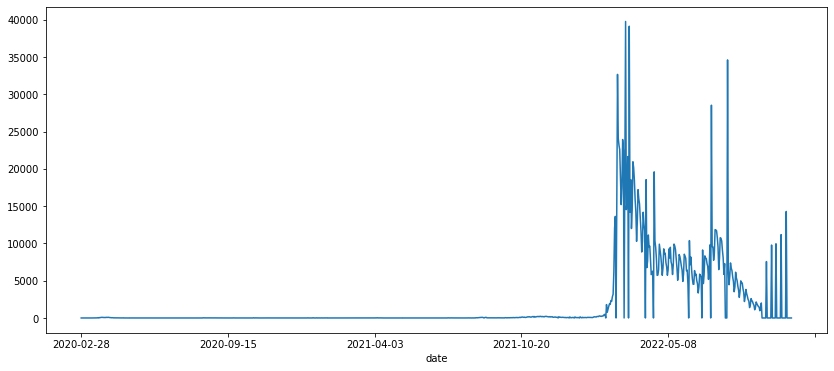

In [8]:
# Visualize Workspace and Outdoor Parks’ Traffic Patterns

df_covid_cases[df_covid_cases['iso_code']=='NZL']['new_cases'].plot(figsize = (14,6));

We see for this query what we did is we first identified the dataframe name which is the Covid cases, and then we applied the condition to limit us to a subset of the records to filter only the country of New Zealand, and from that subset we added another filter to say that we're only interested in the new Covid cases.

Notice how we didn't specify the plot kind so the function applied the default behaviour and generated a time series chart. The figure size parameter is used to identify the size of the graph. 

From the visual representation, we can see the first initial spike in Covid cases appeared in the early 2020, then for the most part of 2020 and 2021, there was almost very low number of cases until around August 2021 where we noticed there was a new outbreak/spike and that spike continued to grow as we move towards the end of the year.

You can now easily change the `ISO code` value to your home country or the country that you are interested in, and watch how the outbreak timeline changed for that area.

That's what we see from the actual cases. What will be the impact of the case numbers on daily life activities such as people movement and traffic behaviour? That will be the insight we can find from the mobility report dataset. 

Let’s try to investigate that for the same country or area during the same time period we used above, and here we will need to add similar filters to limit the location and movement patterns we need.

In this case what we did is we used the mobility report dataframe to filter to a specific subset or specific country.

We limited our query to the country of New Zealand and because for this country there are no subregion values so we added the condition for the subregion value to be null. And from that dataset we use two different columns: the workspace traffic percentage change and the outdoor parks traffic percentage change. 

These patterns represent how people's movement behaviour has changed from the usual pattern prior to the Covid-19 pandemic. Let’s plot this:

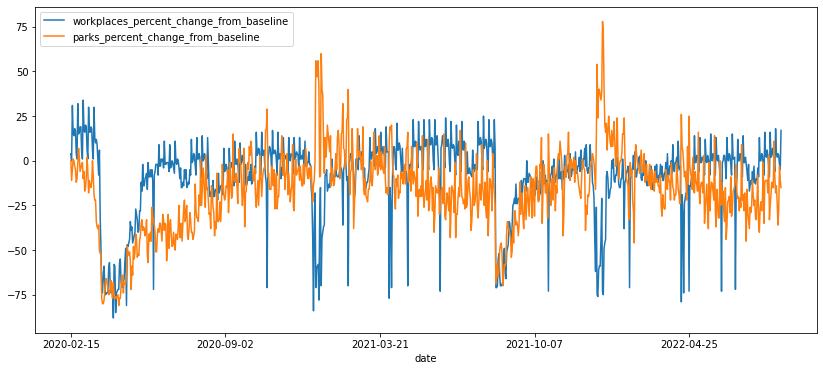

In [9]:
# Visualize Workspace and Outdoor Parks’ Traffic Patterns
df_mobility_data[(df_mobility_data['country_region_code']=='NZ') 
               & (df_mobility_data['sub_region_1'].isnull())][['workplaces_percent_change_from_baseline',
                                                               'parks_percent_change_from_baseline']].plot(figsize = (14,6));

What we notice here is that at the beginning of the pandemic during 2020, we see a big drop in workplace and outdoor parks traffic as the country moved into a major lockdown and most people had to stay and work from home.

We see that both workspace and outdoor park areas have lower than usual traffic patterns, and then as lockdown restrictions started to lift, people started to slowly go back to work from office again, and also enjoy visiting outdoor parks. 

For the majority of time in 2020 and most of 2021, movement patterns were normal until we noticed that same big spike here in August 2021, and we see the same drop in people's mobility again as people had to stay at home again. 

As the restriction started to lift again we see things go back to normal. 

We also notice there are some interesting spikes around Christmas / New Year holidays. Think about what would be some external events that could have affected people's movement behaviour, things like holidays, extreme weather events and so on. 

You can clearly see this big spike around Christmas time when there is so much activity at parks and outdoor areas, but very little activity around the workplace. I will leave it to you to think about what other datasets you may need to import and add to your analysis to understand these spikes.

Overall, this was a small project where we needed to collect some data sets and filter / apply some conditions to analyse the impact of Covid-19 pandemic on people movement and travel behaviour.

Obviously there are so many other things you can do using the Pandas library, and we hope this course has given you all the essentials to get started with Pandas library in your work.

Remember that you can access all the related notebooks from the course GitHub repo. Good luck with your study!